In [4]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import functools
import xgboost
from xgboost import XGBClassifier

In [5]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

# Importing the test data itself
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
train_set.shape

(32561, 15)

In [10]:
test_set.shape

(16281, 15)

In [11]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
train_set.education.value_counts()

In [ ]:
train_set.native_country.value_counts()

In [ ]:
occupation_set = set(train_set['occupation'])
print(occupation_set)

In [ ]:
train_set['occupation'] = train_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [12]:
test_set['occupation'] = test_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [13]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.


In [15]:
train_set['wage_class'] = train_set['wage_class'].map({' <=50K': 0, ' >50K': 1}).astype(int)
test_set['wage_class'] = test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1}).astype(int)

In [16]:
import matplotlib as plt
%matplotlib inline

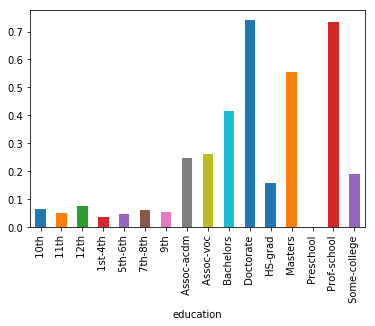

In [17]:
train_set.groupby('education')['wage_class'].mean().plot(kind='bar')

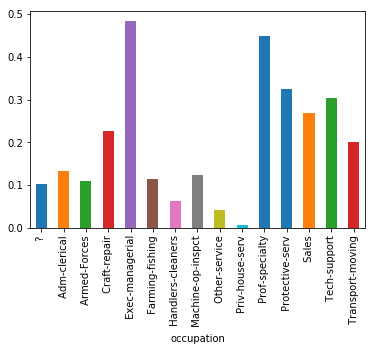

In [18]:
train_set.groupby('occupation')['wage_class'].mean().plot(kind='bar')

In [19]:
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)
race_set = set(train_set['race'])
print(race_set)

{' White', ' Asian-Pac-Islander', ' Other', ' Amer-Indian-Eskimo', ' Black'}


In [20]:
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [21]:
mstatus_set = set(train_set['marital_status'])
print(mstatus_set)

{' Married-AF-spouse', ' Divorced', ' Married-civ-spouse', ' Never-married', ' Widowed', ' Separated', ' Married-spouse-absent'}


In [22]:
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [23]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,5,Adm-clerical,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,Exec-managerial,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,Handlers-cleaners,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,Handlers-cleaners,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,Prof-specialty,Wife,0,1,0,0,40,Cuba,0


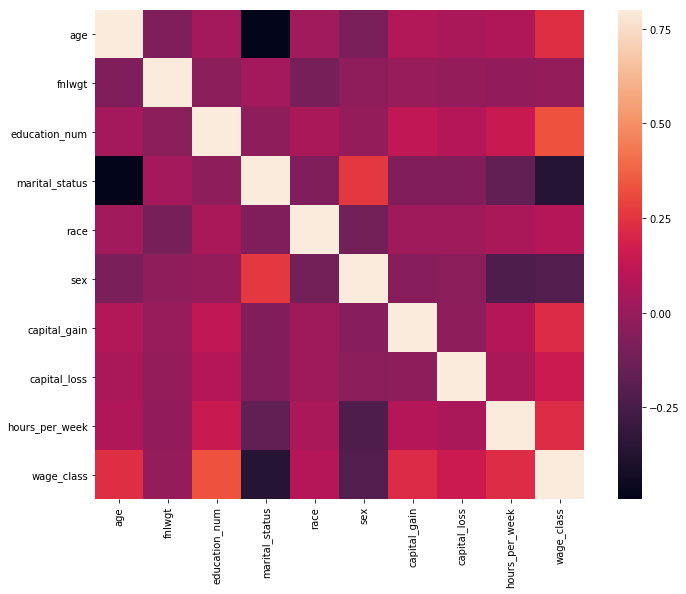

In [24]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = train_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

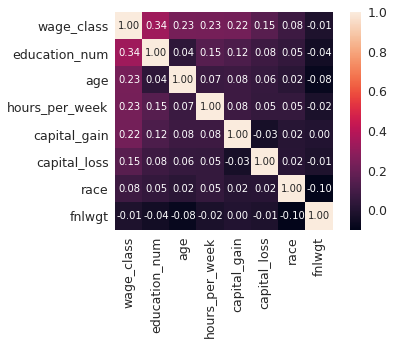

In [25]:
k = 8 
cols = corrmat.nlargest(k, 'wage_class')['wage_class'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

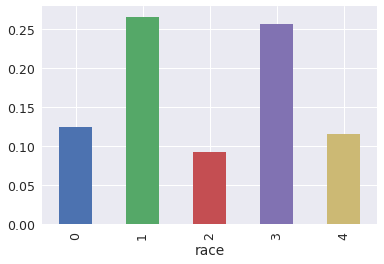

In [26]:
train_set.groupby('race')['wage_class'].mean().plot(kind='bar')

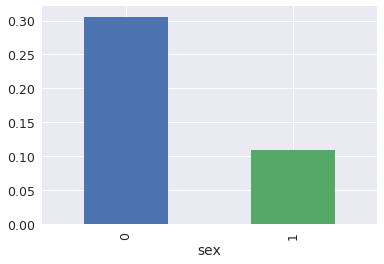

In [27]:
train_set.groupby('sex')['wage_class'].mean().plot(kind='bar')

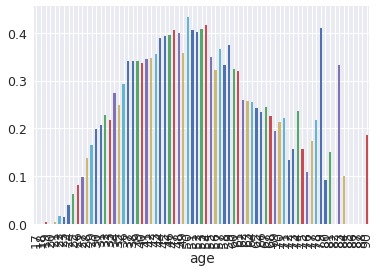

In [28]:
train_set.groupby('age')['wage_class'].mean().plot(kind='bar')

In [29]:
X_train = train_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]
Y_train = train_set['wage_class']
X_test = test_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]
Y_test = test_set['wage_class']

In [31]:
classifier = XGBClassifier()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[11934   501]
 [ 2274  1572]]


In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X = X_train,y = Y_train,cv = 10)
print(accuracies.mean())
print(accuracies.std())

/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

0.8291517928875928
0.006337788569732528


/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
